# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [94]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import citipy to look up for city names with geo-coordinates
from citipy import citipy

# API Keys
from api_keys import weather_api_key

# Set location for a CSV to export all of retrieved data
output = "output/cities.csv"

# latitude and longitude range
lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [95]:
# Initialise an empty list for use in the for-loop 
geo_coordinates = []
cities = []

# Create a set of random geo-coordinates
latitudes = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longitudes = np.random.uniform(lon_range[0], lon_range[1], size=1500)
geo_coordinates = zip(latitudes, longitudes)

# Find the nearest city for each of random geo-coordinates
for geo_coordinate in geo_coordinates:
    city = citipy.nearest_city(geo_coordinate[0], geo_coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm that number exceeds minimum requirement(500)
print(f'Number of randomely selected cities in the list is {len(cities)}.')

Number of randomely selected cities in the list is 614.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [97]:
# Initialise an empty list to store the information from loops
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Create a loop to go through the list of random cities and pull the data on each of them
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # Due to limited API call, get the city data for 50 cities,then sleep for 5 seconds and so on
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
        
    print(f"Processing Record {count} of Set {set} | {city}")
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data retrieval is completed")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | parubcan
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | qurunbaliyah
City not found. Skipping...
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | sturgis
Processing Record 14 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | nantucket
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | mar del plata


Processing Record 39 of Set 4 | parana
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | butaritari
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | sobolevo
Processing Record 47 of Set 4 | omsukchan
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | shingu
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | kjollefjord
Processing Record 3 of Set 5 | yining
Processing Record 4 of Set 5 | kapuskasing
Processing Record 5 of Set 5 | nerekhta
Processing Record 6 of Set 5 | yeppoon
Processing Record 7 of Set 5 | simbahan
Processing Record 8 of Set 5 | itupiranga
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | clairmont
Processing Record 11 of Set 5 | tessalit
Processing Record 12 of Set 5 | st

Processing Record 26 of Set 8 | lasa
Processing Record 27 of Set 8 | belyy yar
Processing Record 28 of Set 8 | fayaoue
Processing Record 29 of Set 8 | jacareacanga
Processing Record 30 of Set 8 | ust-maya
Processing Record 31 of Set 8 | santa rosa
Processing Record 32 of Set 8 | puerto carreno
Processing Record 33 of Set 8 | loreto
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | am timan
Processing Record 36 of Set 8 | ucluelet
Processing Record 37 of Set 8 | ambovombe
Processing Record 38 of Set 8 | camacha
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | mildura
Processing Record 41 of Set 8 | huercal-overa
Processing Record 42 of Set 8 | jinji
Processing Record 43 of Set 8 | narsaq
Processing Record 44 of Set 8 | norrtalje
Processing Record 45 of Set 8 | villazon
Processing Record 46 of Set 8 | calama
Processing Record 47 of Set 8 | penzance
Processing Record 48 of Set 8 | garden city
Processing Record 49 of Set 8 | dhadar
Processing Re

Processing Record 14 of Set 12 | port hedland
Processing Record 15 of Set 12 | nizwa
Processing Record 16 of Set 12 | talcahuano
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | manta
Processing Record 19 of Set 12 | longlac
City not found. Skipping...
Processing Record 20 of Set 12 | pontes e lacerda
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | santa cruz del sur
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | hermiston
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | gladstone
Processing Record 27 of Set 12 | durban
Processing Record 28 of Set 12 | wonthaggi
Processing Record 29 of Set 12 | utiroa
City not found. Skipping...
Processing Record 30 of Set 12 | turkan
Processing Record 31 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 32 of Set 12 | chernyshevskiy
Processing Record 33 of Set 12 | okha
Processing Record 34 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# Convert raw data to DataFrame
weather_df = pd.DataFrame({"City": cities,
                           "Lat": lat,
                           "Lng": lon,
                           "Max Temp": temp_max,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date,
                                })
# Drop the cities that were skipped 
weather_df = weather_df.dropna(how="any")
print(weather_df.count())

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64


In [99]:
# Export the city data into a .csv file.
weather_df.to_csv("output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("output_data/city_weather_data.csv")

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,31.66,93.0,40.0,20.71,AR,1.631777e+09
1,victoria,22.2855,114.1577,93.16,72.0,39.0,1.01,HK,1.631777e+09
2,sao filipe,14.8961,-24.4956,79.59,81.0,25.0,9.80,CV,1.631777e+09
3,okhotsk,59.3833,143.3000,57.09,76.0,99.0,10.11,RU,1.631777e+09
4,ahipara,-35.1667,173.1667,58.95,97.0,67.0,6.89,NZ,1.631777e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.880902,11.993764,66.098203,69.971530,53.798932,7.581548,1.631777e+09
std,33.639495,90.519588,16.114107,21.989122,40.935371,5.358058,2.224934e+02
min,-54.800000,-179.166700,15.780000,3.000000,0.000000,0.000000,1.631777e+09
25%,-9.093300,-68.468075,53.827500,59.000000,6.000000,3.605000,1.631777e+09
50%,22.912100,18.005450,69.745000,75.000000,62.500000,6.680000,1.631777e+09
75%,49.181150,82.665825,78.385000,87.000000,99.000000,10.110000,1.631777e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,34.520000,1.631778e+09


As per above table maximum humidity in the cities that are included in the dataframe is 100, therefore, this step is skipped.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

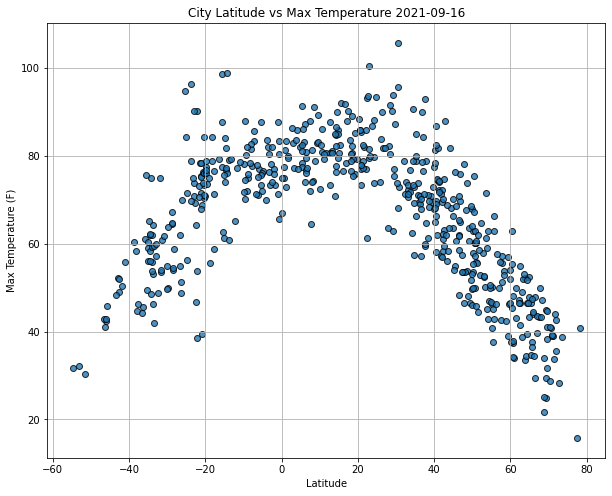

In [101]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("output_data/City Latitude vs Max Temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between latitude (x-axis) and max temperature (y-axis). 

This result shows that cities that are located closer to the equater have higher temrature comparing to the cities that are farther from the equator.

## Latitude vs. Humidity Plot

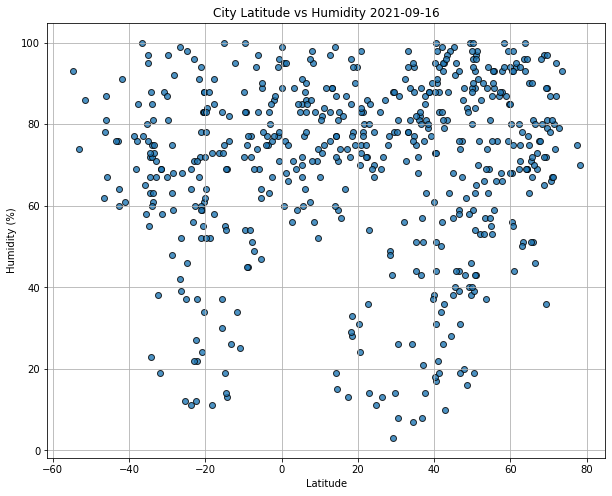

In [102]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("output_data/City Latitude vs Humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between latitude (x-axis) and humidity (%) (y-axis).
This result shows that humidity is distributed through different latitudes.

## Latitude vs. Cloudiness Plot

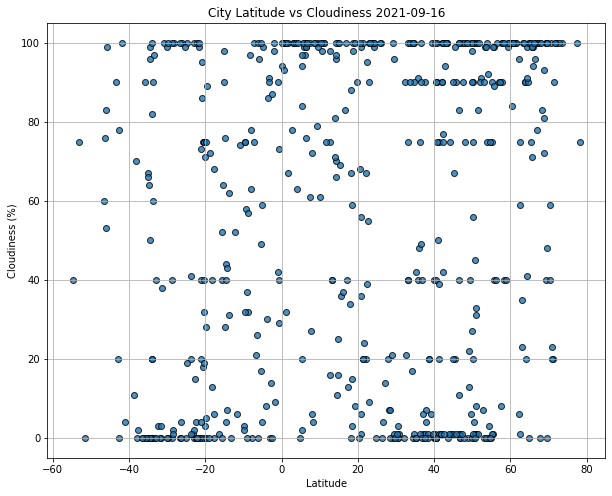

In [103]:
# Scatter plot for latitude vs. cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("output_data/City Latitude vs Cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between latitude (x-axis) and cloudliness (%) (y-axis).
This result shows that being closer to the equator does not affect a city's cloudliness (%).

## Latitude vs. Wind Speed Plot

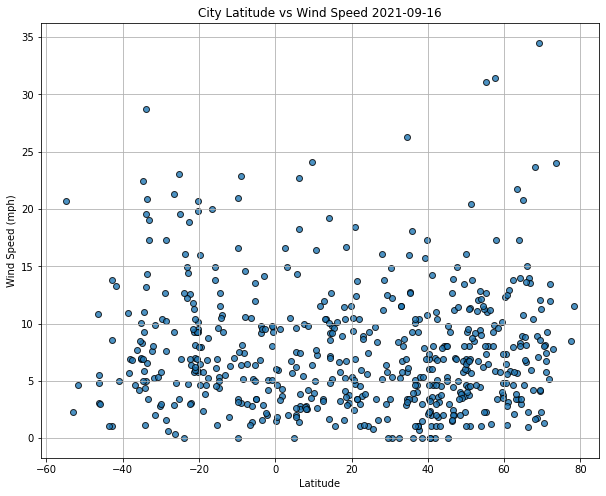

In [104]:
# Scatter plot for latitude vs. wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("output_data/City Latitude vs Wind Speed.png", bbox_inches="tight")
plt.show()

The above scatter plot shows the relationship between latitude (x-axis) and wind speed (mph) (y-axis).

The highest wind speed was recorded for the cities farther to the equater.

## Linear Regression

In [105]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is {rvalue**2}.")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between the two factors is {round(correlation[0],2)}.")
    return plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [106]:
# Create DataFrames for Northern Hemisphere and Southern Hemisphere 

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is 0.7015971870449076.
The correlation between the two factors is -0.84.


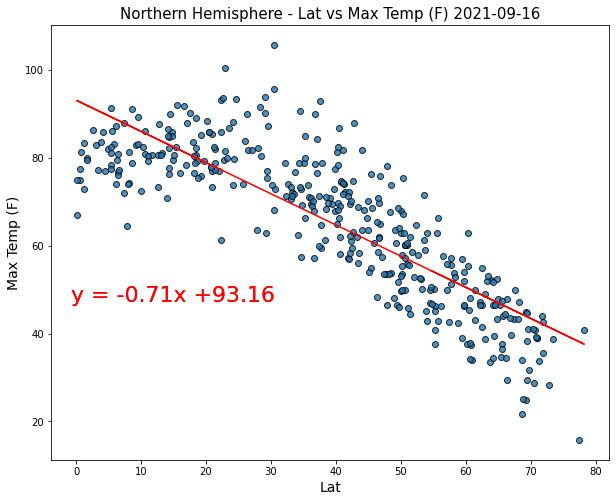

In [107]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("output_data/Northern Hemisphere Latitude vs Max Temperature.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.0036827575939568096.
The correlation between the two factors is 0.06.


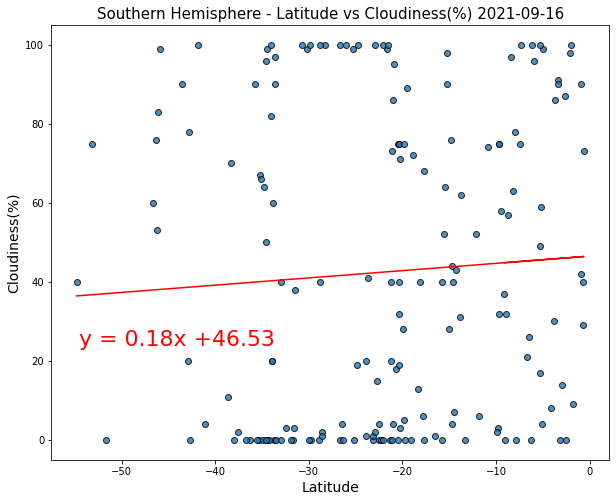

In [108]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("output_data/Southern Hemisphere Latitude vs Max Temperature.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0018115476231740644.
The correlation between the two factors is 0.04.


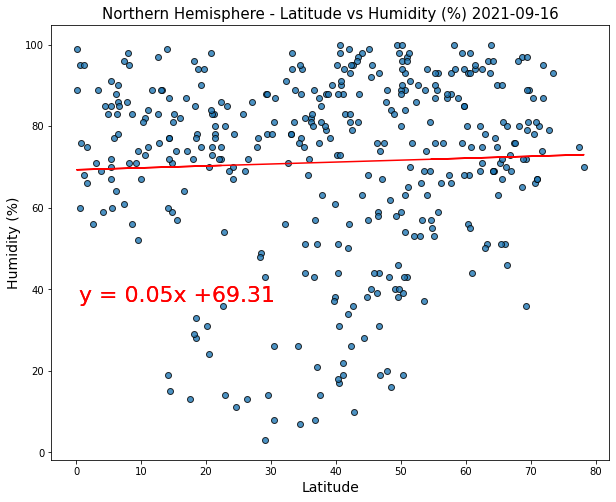

In [109]:
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("output_data/Northern Hemisphere Humidity vs Latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0018115476231740644.
The correlation between the two factors is 0.04.


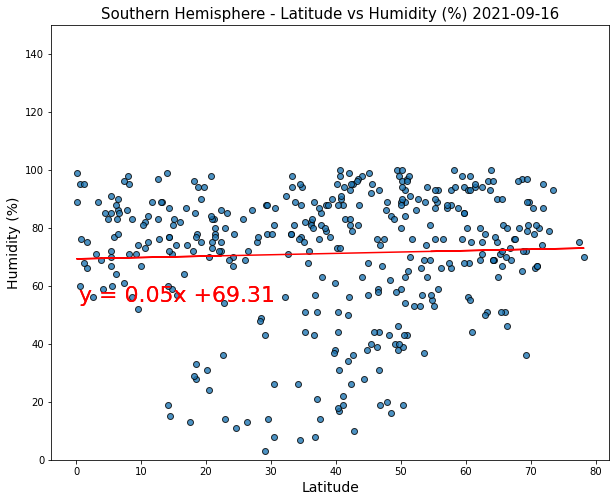

In [110]:
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("output_data/Southern Hemisphere Humidity vs Latitude.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0007230143439174407.
The correlation between the two factors is 0.03.


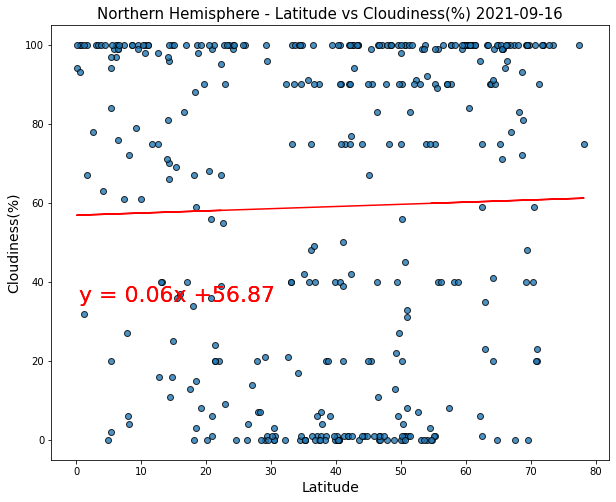

In [111]:
# Scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("output_data/Northern Hemisphere Cloudiness vs Latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0036827575939568096.
The correlation between the two factors is 0.06.


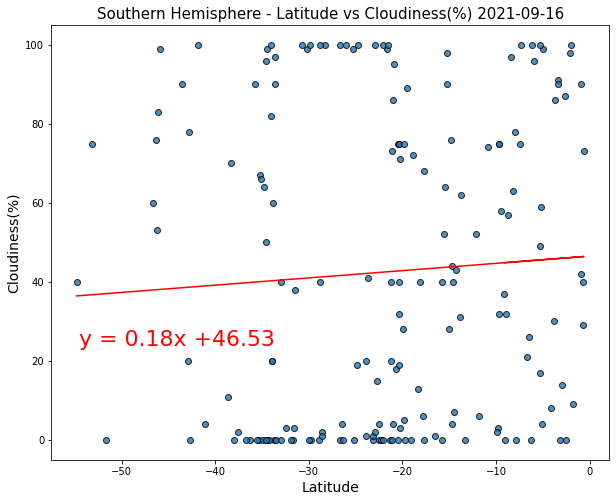

In [112]:
# Scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("output_data/Southern Hemisphere Cloudiness vs Latitude.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.012497298258145545.
The correlation between the two factors is 0.11.


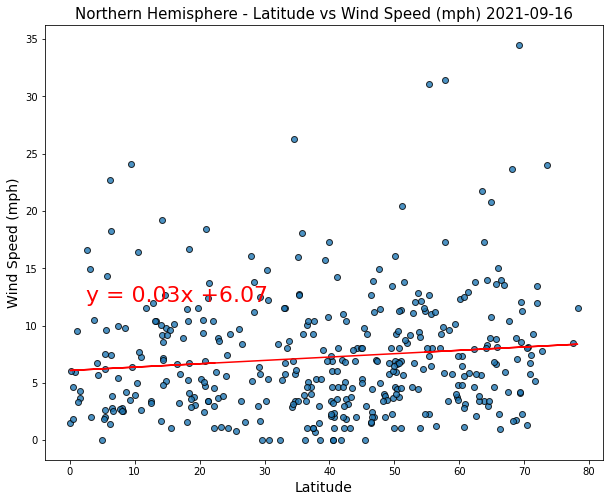

In [113]:
# Scatter plot for latitude vs wind speed (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("output_data/Northern Hemisphere Latitude Wind Speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.005884625964360623.
The correlation between the two factors is -0.08.


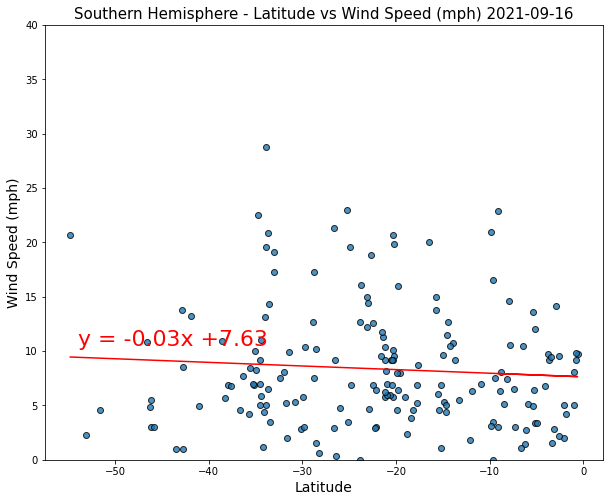

In [114]:
# Scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("output_data/Southern Hemisphere Latitude Wind Speed.png", bbox_inches="tight")
plt.show()

# Final observations and insights 

1.Above analysis shows that cities that are closer to the equator have higher temperature.

2.The correlation between humidity and latitude for both northern and southern hemisphere cities is week and negative

3.The correlation between cloudiness and latitude is also week and negative. 